In [1]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
# Read csv file into dataframe
df = pd.read_csv('paysim.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00","6,362,620.00"
mean,243.40,"179,861.90","833,883.10","855,113.67","1,100,701.67","1,224,996.40",0.00,0.00
std,142.33,"603,858.23","2,888,242.67","2,924,048.50","3,399,180.11","3,674,128.94",0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,"13,389.57",0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,"74,871.94","14,208.00",0.00,"132,705.66","214,661.44",0.00,0.00
75%,335.00,"208,721.48","107,315.18","144,258.41","943,036.71","1,111,909.25",0.00,0.00
max,743.00,"92,445,516.64","59,585,040.37","49,585,040.37","356,015,889.35","356,179,278.92",1.00,1.00


In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [5]:
# Get count of null values per cokumn
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# Check frequency of step, which represents an hour time interval.  
# All periods have some transaction, and there is a cluster of periods with the most activity. 
print(df['step'].value_counts(sort=True).head(5))
print(df['step'].value_counts(sort=True).tail(5))
df['step'].value_counts().describe()

19     51352
18     49579
187    49083
235    47491
307    46968
Name: step, dtype: int64
725    4
245    4
655    4
112    2
662    2
Name: step, dtype: int64


count      743.00
mean     8,563.42
std     13,388.69
min          2.00
25%         12.00
50%        529.00
75%     12,317.00
max     51,352.00
Name: step, dtype: float64

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

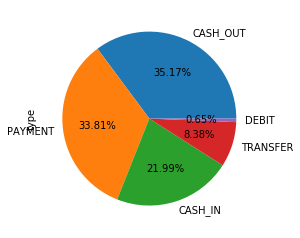

In [7]:
# Get count of unique values for "type" field and display pie chart distribution 
df.type.value_counts().plot.pie(autopct='%.2f%%')
df['type'].value_counts()

In [8]:
# Check the count of value zero "0" for "amount" column
# Investigate further how "0" could be the value for a transaction amount
zero_amount = df[df.amount == 0]
print('The ratio of zero values is ' + str(round(len(zero_amount)/len(df['amount']),6)*100) + '% or ' 
      + '{0:,.0f}'.format(len(zero_amount)) + ' of ' +'{0:,.0f}'.format(len(df['amount'])))

The ratio of zero values is 0.00030000000000000003% or 16 of 6,362,620


In [9]:
# Check the frequency stats from describe() for origin account
# The top frequency for any one account is 3
df['nameOrig'].describe()

count        6362620
unique       6353307
top       C724452879
freq               3
Name: nameOrig, dtype: object

In [10]:
# Check the count of value zero "0" for "oldbalanceOrg" column 
zero_oldbalanceOrg = df[df.oldbalanceOrg == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceOrg)/len(df['oldbalanceOrg']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceOrg)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceOrg'])))

The ratio of zero values is 0.33 or 2,102,449 of 6,362,620


In [11]:
# Check the count of value zero "0" for a "newbalanceOrig" column
zero_newbalanceOrig = df[df.newbalanceOrig == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceOrig)/len(df['newbalanceOrig']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceOrig)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceOrig'])))

The ratio of zero values is 0.57 or 3,609,566 of 6,362,620


In [12]:
# Check the frequency stats from describe() for destination account, 
# Note the top frequency for destination accounts is 113, several accounts are used nearly as frequently
# And the number of unique accounts is nearly half the number of transactions
print(df['nameDest'].value_counts(sort=True).head(5))
print(df['nameDest'].value_counts(sort=True).tail(5))
df['nameDest'].describe()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: nameDest, dtype: int64
M1513322271    1
M825023710     1
M585883398     1
M1981824922    1
M79302992      1
Name: nameDest, dtype: int64


count         6362620
unique        2722362
top       C1286084959
freq              113
Name: nameDest, dtype: object

In [13]:
# Check the count of value zero "0" for "oldbalanceDest" column
zero_oldbalanceDest = df[df.oldbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_oldbalanceDest)/len(df['oldbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_oldbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['oldbalanceDest'])))

The ratio of zero values is 0.43 or 2,704,388 of 6,362,620


In [14]:
# Check the count of value zero "0" for "newbalanceDest" column
zero_newbalanceDest = df[df.newbalanceDest == 0]
print('The ratio of zero values is ' + str(round(len(zero_newbalanceDest)/len(df['newbalanceDest']),2)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_newbalanceDest)) + ' of ' +'{0:,.0f}'.format(len(df['newbalanceDest'])))

The ratio of zero values is 0.38 or 2,439,433 of 6,362,620


The ratio of zero values is 0.998709 or 6,354,407 of 6,362,620
The number of isFraud cases is 8,213


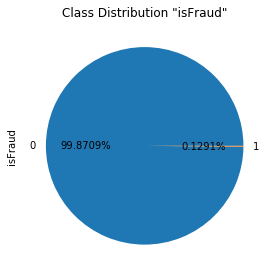

In [16]:
# Check the count of value zero "0" for "isFraud" column and show pie chart
# The zero is a boolean indicator, and represents a small percentage of the population
zero_isFraud = df[df.isFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFraud)/len(df['isFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFraud'])))
print('The number of isFraud cases is ' + '{0:,.0f}'.format(len(df['isFraud'])-len(zero_isFraud)))
df.isFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFraud"')
plt.tight_layout()

The ratio of zero values is 0.999997 or 6,362,604 of 6,362,620
The number of isFlaggedFraud cases is 16


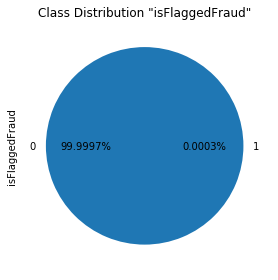

In [17]:
# Check the count of value zero "0" for "isFlaggedFraud" column
# The zero is a boolean indicator, and represents a small percentage of the population 
zero_isFlaggedFraud = df[df.isFlaggedFraud == 0]
print('The ratio of zero values is ' + str(round(len(zero_isFlaggedFraud)/len(df['isFlaggedFraud']),6)) + ' or ' 
      + '{0:,.0f}'.format(len(zero_isFlaggedFraud)) + ' of ' +'{0:,.0f}'.format(len(df['isFlaggedFraud'])))
print('The number of isFlaggedFraud cases is ' + '{0:,.0f}'.format(len(df['isFlaggedFraud'])-len(zero_isFlaggedFraud)))
df.isFlaggedFraud.value_counts().plot.pie(autopct='%.4f%%')
plt.title('Class Distribution "isFlaggedFraud"')
plt.tight_layout()

In [18]:
# The isFlaggedFraud indicator coincides with the only zero amounts
zero_amount.head(16)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.00,C1510987794,0.00,0.00,C1696624817,0.00,0.00,1,0
3247298,250,CASH_OUT,0.00,C521393327,0.00,0.00,C480398193,0.00,0.00,1,0
3760289,279,CASH_OUT,0.00,C539112012,0.00,0.00,C1106468520,"538,547.63","538,547.63",1,0
5563714,387,CASH_OUT,0.00,C1294472700,0.00,0.00,C1325541393,"7,970,766.57","7,970,766.57",1,0
5996408,425,CASH_OUT,0.00,C832555372,0.00,0.00,C1462759334,"76,759.90","76,759.90",1,0
5996410,425,CASH_OUT,0.00,C69493310,0.00,0.00,C719711728,"2,921,531.34","2,921,531.34",1,0
6168500,554,CASH_OUT,0.00,C10965156,0.00,0.00,C1493336195,"230,289.66","230,289.66",1,0
6205440,586,CASH_OUT,0.00,C1303719003,0.00,0.00,C900608348,"1,328,472.86","1,328,472.86",1,0
6266414,617,CASH_OUT,0.00,C1971175979,0.00,0.00,C1352345416,0.00,0.00,1,0
6281483,646,CASH_OUT,0.00,C2060908932,0.00,0.00,C1587892888,0.00,0.00,1,0


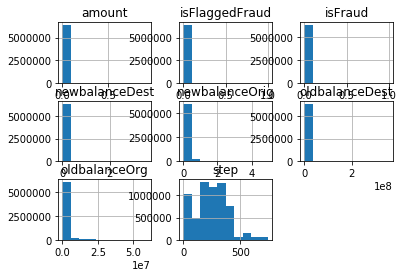

<Figure size 432x288 with 0 Axes>

In [19]:
# Check the histogram for all columns. Note the imbalanced nature of the data, meaning that there are very few fraud cases.
#df.hist(bins=50, figsize=(15,15), color = 'cyan')
df.hist()
plt.show()
plt.tight_layout()